<a href="https://colab.research.google.com/github/sayashraaj/BTP/blob/main/Gurobi_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TO DO**



1. Big M using indicator variable DONE
2. Model is infeasible when t[origin] is used DONE
3. Convert DB to 14 Day DB
4. Build Cost from DB, not dummy
5. Change t[dest] to ? for multiple dests
6. Test on bigger sample network DONE
7. Use variability in sample network

### Setup and Installation

In [1]:
!pip install gurobipy  # install gurobipy, if not already installed
import gurobipy as gp  # import the installed package

# Create an environment with your WLS license
params = {
"WLSACCESSID": 'f5a52c8d-c747-487a-bf9e-fd3f23ec1c72',
"WLSSECRET": '0bff086e-4c28-4979-b1d9-eadc994a435f',
"LICENSEID": 942624,
}
env = gp.Env(params=params)

# Create the model within the Gurobi environment
model = gp.Model(env=env)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 34.9 MB/s eta 0:00:00
Set parameter WLSAccessID
Set parameter WLSSecret
Set parameter LicenseID to value 942624
Academic license - for non-commercial use only - registered to ce19b113@smail.iitm.ac.in


In [2]:
# example max flow problem

from gurobipy import *

nodes = [1, 2, 3, 4, 5] # Make a list of nodes
links = [(1, 2), (1, 3), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)] # Make a list of links
capacity = {(1, 2):15, (1, 3):8, (2, 3):float("inf"), (2, 4):4, (2, 5):10, (3, 4): 15, (3, 5):4, (4, 5):float("inf")}

m = Model()
v = m.addVar(vtype = GRB.CONTINUOUS)
x = m.addVars(links, vtype = GRB.INTEGER)

forwardStar = {1:[2, 3], 2:[3, 4, 5], 3:[4], 4:[5], 5:[]}
backwardStar = {1:[], 2:[1], 3:[1, 2], 4:[2, 3], 5:[2, 4]}

# Constraints
origin = 1
dest = 5

m.addConstr(sum([x[origin, k] for k in forwardStar[origin]]) == v)
m.addConstr(sum([x[k, dest] for k in backwardStar[dest]]) == v)

for n in nodes:
    if n not in [origin, dest]:
        m.addConstr(sum([x[n, k] for k in forwardStar[n]]) == sum([x[k, n] for k in backwardStar[n]]))
        
for a in links:
    m.addConstr(x[a] <= capacity[a])
    
obj = v
m.Params.outputFlag = 0
m.setObjective(obj, sense = GRB.MAXIMIZE)
m.optimize()


print('maximum flow from 1 to 5 is: ', v.x)
for (a, b) in links:
    print('Flow on link ', (a, b), ' is:', x[a, b].x)

Restricted license - for non-production use only - expires 2024-10-28
maximum flow from 1 to 5 is:  23.0
Flow on link  (1, 2)  is: 15.0
Flow on link  (1, 3)  is: 8.0
Flow on link  (2, 3)  is: 1.0
Flow on link  (2, 4)  is: 4.0
Flow on link  (2, 5)  is: 10.0
Flow on link  (3, 4)  is: 9.0
Flow on link  (3, 5)  is: -0.0
Flow on link  (4, 5)  is: 13.0


In [3]:
def forwardStarMaker(arr):
  ans = {}
  for (a,b) in arr:
    if a in ans:
      ans[a].append(b)
    else:
      ans[a] = [b]

  for n in nodes:
    if n not in ans:
      ans[n]=[]
  return ans

def backwardStarMaker(arr):
  ans = {}
  for (a,b) in arr:
    if b in ans:
      ans[b].append(a)
    else:
      ans[b] = [a]
  for n in nodes:
    if n not in ans:
      ans[n]=[]
  
  # print("**************** backwardStar ****************")
  # for node in nodes:
  #   if node in ans:
  #     print("node",node,":",ans[node])
  #   else:
  #     print("NOT FOUND", node)

  return ans


# Displaying the Solution

# for (a, b) in links: 
#   if x[a,b].x:
#     print('Flow on link ', (a, b), ' is:', x[a, b].x)

def printTvalues(t, x, nodes, links):
  ans = {}
  for (a,b) in links:
    if x[a,b].x:
      print('Flow on link ', (a, b), ' is:', x[a, b].x)
      ans[a]=1
      ans[b]=1
  print("***********Printing T Values**************")
  for n in ans.keys():
    print("T for",n,":",t[n].x)
  # for n in nodes:
  #   print("T for",n,":",t[n].x)

Actual Network

In [4]:
# Actual network
nodes = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107]
links = [(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14), (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20), (20, 21), (21, 22), (22, 23), (23, 24), (24, 25), (25, 26), (26, 27), (27, 28), (28, 29), (28, 79), (28, 80), (29, 30), (29, 77), (29, 78), (30, 31), (30, 77), (30, 78), (31, 32), (32, 33), (33, 34), (34, 35), (35, 36), (36, 37), (37, 38), (38, 39), (39, 40), (40, 41), (41, 42), (42, 43), (43, 44), (44, 45), (45, 46), (46, 47), (47, 48), (48, 49), (49, 50), (50, 51), (51, 52), (52, 53), (54, 55), (55, 56), (56, 57), (57, 58), (58, 59), (59, 60), (60, 61), (61, 62), (62, 63), (63, 64), (64, 65), (65, 66), (66, 67), (67, 68), (68, 69), (69, 70), (70, 71), (71, 72), (72, 73), (73, 74), (74, 75), (74, 33), (74, 34), (75, 76), (75, 31), (75, 32), (76, 77), (76, 31), (76, 32), (77, 78), (78, 79), (79, 80), (80, 81), (81, 82), (82, 83), (83, 84), (84, 85), (85, 86), (86, 87), (87, 88), (88, 89), (89, 90), (90, 91), (91, 92), (92, 93), (93, 94), (94, 95), (95, 96), (96, 97), (97, 98), (98, 99), (99, 100), (100, 101), (101, 102), (102, 103), (103, 104), (104, 105), (105, 106), (106, 107)]
cost = [[0 for x in nodes] for y in nodes]
for (a,b) in links:
  cost[a][b] = 1

In [5]:
# Test Network 1

nodes = [0,1,2,3,4,5]
links = [(0,1), (1,2), (1,3), (1,4), (2,3), (3,5), (4,5)]
cost = [[0 for x in nodes] for y in nodes]
for (a,b) in links:
  cost[a][b] = 1

In [6]:
# Test Network 2

nodes = [0,1,2,3,4]
links = [(0,1), (0,2), (0,3), (1,2), (2,4), (3,4)]
cost = [[0 for x in nodes] for y in nodes]
for (a,b) in links:
  cost[a][b] = 1
cost[0][1]=100

In [7]:
# Test Network 3
# Multiple destinations

nodes = [0,1,2,3,4]
links = [(0,1), (0,2), (1,3), (2,4), (1,2)]
cost = [[0 for x in nodes] for y in nodes]
for (a,b) in links:
  cost[a][b] = 1
cost[0][1]=100

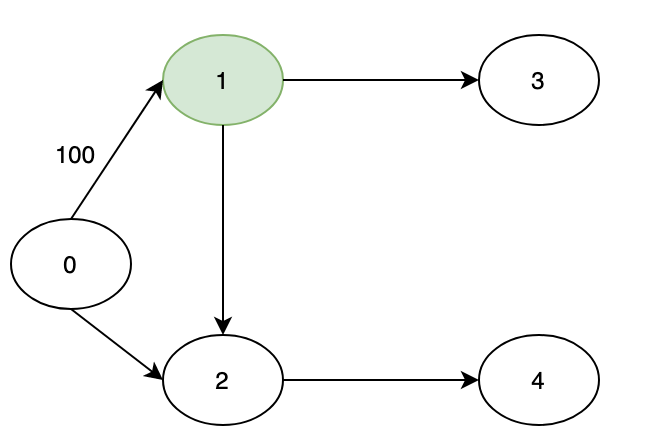

In [8]:
# Test Network 4
# Multiple destinations, Multiple solutions

nodes = [0,1,2,3,4,5,6,7]
links = [(0,1), (0,3), (0,4), (0,5), (1,6), (2,1), (2,6), (3,2), (4,7), (7,2), (7,6)]

cost = [[0 for x in nodes] for y in nodes]
for (a,b) in links:
  cost[a][b] = 1
cost[2][6]=100

In [9]:
# Test Network 5

import random
import networkx as nx #improting the package as "nx"

G=nx.gnp_random_graph(30,0.2,directed=True)
DAG = nx.DiGraph([(u,v,{'weight':random.randint(-10,10)}) for (u,v) in G.edges() if u<v])
nx.is_directed_acyclic_graph(DAG)

print(DAG.nodes)
print(DAG.edges)
# generate node positions:
pos = nx.random_layout(DAG)

nodes = list(DAG.nodes)
links = list(DAG.edges)
cost = [[0 for x in nodes] for y in nodes]
for (a,b) in links:
  cost[a][b] = 1
# cost[0][1]=100

[0, 2, 4, 8, 12, 14, 19, 28, 1, 9, 22, 6, 20, 3, 15, 24, 7, 5, 13, 17, 18, 10, 21, 25, 27, 11, 16, 29, 23, 26]
[(0, 2), (0, 4), (0, 8), (0, 12), (0, 14), (0, 19), (0, 28), (2, 6), (2, 20), (4, 6), (4, 7), (4, 14), (4, 15), (4, 19), (8, 13), (8, 14), (8, 20), (8, 24), (12, 14), (12, 16), (12, 23), (12, 26), (14, 20), (14, 21), (14, 22), (14, 29), (19, 23), (19, 25), (19, 29), (28, 29), (1, 9), (1, 12), (1, 22), (9, 20), (22, 23), (6, 10), (6, 20), (6, 21), (6, 25), (6, 27), (6, 28), (3, 6), (3, 12), (3, 14), (3, 15), (3, 24), (3, 28), (15, 22), (15, 29), (24, 25), (24, 29), (7, 11), (7, 16), (7, 21), (7, 22), (7, 24), (7, 25), (7, 29), (5, 13), (5, 17), (5, 18), (13, 17), (13, 19), (13, 22), (18, 29), (10, 11), (10, 17), (10, 21), (10, 23), (21, 27), (21, 29), (25, 28), (16, 17), (23, 25), (23, 28)]


Visualisation

[0, 2, 4, 8, 12, 14, 19, 28, 1, 9, 22, 6, 20, 3, 15, 24, 7, 5, 13, 17, 18, 10, 21, 25, 27, 11, 16, 29, 23, 26]
[(0, 2), (0, 4), (0, 8), (0, 12), (0, 14), (0, 19), (0, 28), (2, 6), (2, 20), (4, 6), (4, 7), (4, 14), (4, 15), (4, 19), (8, 13), (8, 14), (8, 20), (8, 24), (12, 14), (12, 16), (12, 23), (12, 26), (14, 20), (14, 21), (14, 22), (14, 29), (19, 23), (19, 25), (19, 29), (28, 29), (1, 9), (1, 12), (1, 22), (9, 20), (22, 23), (6, 10), (6, 20), (6, 21), (6, 25), (6, 27), (6, 28), (3, 6), (3, 12), (3, 14), (3, 15), (3, 24), (3, 28), (15, 22), (15, 29), (24, 25), (24, 29), (7, 11), (7, 16), (7, 21), (7, 22), (7, 24), (7, 25), (7, 29), (5, 13), (5, 17), (5, 18), (13, 17), (13, 19), (13, 22), (18, 29), (10, 11), (10, 17), (10, 21), (10, 23), (21, 27), (21, 29), (25, 28), (16, 17), (23, 25), (23, 28)]


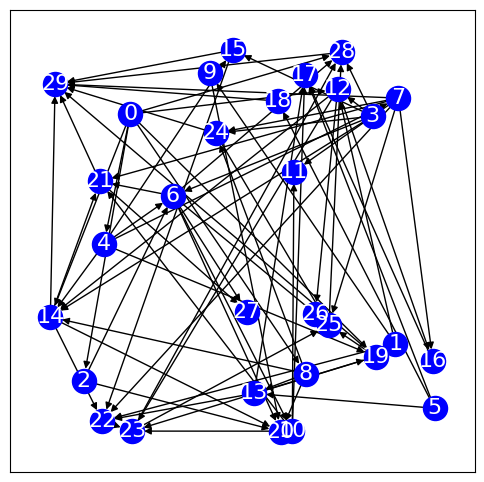

In [10]:
# visualisation of the actual network

import networkx as nx #improting the package as "nx"
import matplotlib.pyplot as plt

g = nx.DiGraph() # Initialize the directed graph
g.add_nodes_from(nodes) # Add nodes to the graph from the list we created
g.add_edges_from(links) # Add links from the list we created
#Check if the nodes and links are added by printing them
print(g.nodes)
print(g.edges)
# generate node positions:
pos = nx.random_layout(g)
# draw graph
plt.figure(3,figsize=(6,6)) 
nx.draw_networkx(g, pos=pos, font_size=16, node_color='blue', font_color='white')
# draw subgraph for highlights
# nx.draw_networkx(g.subgraph(29), pos=pos, font_size=16, node_color='red', font_color='green')

### Single Dest

In [11]:
# LP trial

from gurobipy import *

N = len(nodes)

m = Model()
t = m.addVars(nodes, vtype = GRB.INTEGER)
x = m.addVars(links, vtype = GRB.BINARY)

forwardStar = forwardStarMaker(links)
backwardStar = backwardStarMaker(links)

# Constraints
origin = 0
dest = 3
nodesToVisit = []

m.addConstr(sum([x[origin, k] for k in forwardStar[origin]]) == 1, name = "exit from origin")  # exit from origin
m.addConstr(sum([x[k, dest] for k in backwardStar[dest]]) == 1, name = "entry to dest") # entry to dest

m.addConstr(t[origin] >= 0.0, name = "t[origin]")

for (i,j) in links:
  # Original constraints
  # m.addConstr(t[nodes[j]]-t[nodes[i]]>=cost[i][j]+1+1000*(1-x[i,j]), name = "t[i] t[j] LB activity time ["+str(i)+", "+str(j)+"]")
  # m.addConstr(t[nodes[j]]-t[nodes[i]]<=cost[i][j]+1000+1000*(1-x[i,j]), name = "t[i] t[j] UB activity time ["+str(i)+", "+str(j)+"]")

  # Original Indicator constraints
  m.addConstr((x[i,j] == 1) >> (t[nodes[j]]-t[nodes[i]]>=cost[i][j]+1), name = "t[i] t[j] LB activity time ["+str(i)+", "+str(j)+"]")
  m.addConstr((x[i,j] == 1) >> (t[nodes[j]]-t[nodes[i]]<=cost[i][j]+1000), name = "t[i] t[j] UB activity time ["+str(i)+", "+str(j)+"]")

  # Modified constraints
  # m.addConstr(t[nodes[j]]-t[nodes[i]]>=cost[i][j]+1+x[i,j]*1000*(1-x[i,j]), name = "t[i] t[j] LB activity time ["+str(i)+", "+str(j)+"]")

for n in nodes:
    if n not in [origin, dest]:
      m.addConstr(sum([x[n, k] for k in forwardStar[n]]) == sum([x[k, n] for k in backwardStar[n]]), name = "flow conservation ["+str(i)+", "+str(j)+"]")

      if n in nodesToVisit:
        m.addConstr(sum([x[n, k] for k in forwardStar[n]]) >= 1)
        m.addConstr(sum([x[k, n] for k in backwardStar[n]]) >= 1)

# obj = sum([cost[i][j]*x[i,j] for (i,j) in links])
obj = t[dest]
m.Params.outputFlag = 0
m.setObjective(obj, sense = GRB.MINIMIZE)
m.optimize()

if m.status == GRB.OPTIMAL:
    print('model is optimal ✅✅✅')
    # print('objective value:',obj.getValue())
    print('objective value:',obj.x)
    print('')
    printTvalues(t, x, nodes, links)
elif m.status ==GRB.INFEASIBLE:
    print('model is infeasible ❌❌❌')

    m.computeIIS();
    for c in m.getConstrs():
        if c.IISConstr:
            print('%s' % c.constrName)
elif m.status == GRB.UNBOUNDED:
    print('model is unbounded')
else:
    print('Not sure')

model is infeasible ❌❌❌
entry to dest


### Multiple Dest Approach 1

In [12]:
# LP trial

from gurobipy import *

def gurobi_optimiser_multiple_dest_1(d):

  N = len(nodes)

  m = Model()
  t = m.addVars(nodes, vtype = GRB.INTEGER)
  x = m.addVars(links, vtype = GRB.BINARY)

  forwardStar = forwardStarMaker(links)
  backwardStar = backwardStarMaker(links)

  # Constraints
  origin = 0
  dest = d
  nodesToVisit = [1]

  m.addConstr(sum([x[origin, k] for k in forwardStar[origin]]) == 1, name = "exit from origin")  # exit from origin
  m.addConstr(sum([x[k, dest] for k in backwardStar[dest]]) == 1, name = "entry to dest") # entry to dest

  m.addConstr(t[origin] >= 0.0, name = "t[origin]")

  for (i,j) in links:
    # Original constraints
    # m.addConstr(t[nodes[j]]-t[nodes[i]]>=cost[i][j]+1+1000*(1-x[i,j]), name = "t[i] t[j] LB activity time ["+str(i)+", "+str(j)+"]")
    # m.addConstr(t[nodes[j]]-t[nodes[i]]<=cost[i][j]+1000+1000*(1-x[i,j]), name = "t[i] t[j] UB activity time ["+str(i)+", "+str(j)+"]")

    # Original Indicator constraints
    m.addConstr((x[i,j] == 1) >> (t[nodes[j]]-t[nodes[i]]>=cost[i][j]+1), name = "t[i] t[j] LB activity time ["+str(i)+", "+str(j)+"]")
    m.addConstr((x[i,j] == 1) >> (t[nodes[j]]-t[nodes[i]]<=cost[i][j]+1000), name = "t[i] t[j] UB activity time ["+str(i)+", "+str(j)+"]")

    # Modified constraints
    # m.addConstr(t[nodes[j]]-t[nodes[i]]>=cost[i][j]+1+x[i,j]*1000*(1-x[i,j]), name = "t[i] t[j] LB activity time ["+str(i)+", "+str(j)+"]")

  for n in nodes:
      if n not in [origin, dest]:
        m.addConstr(sum([x[n, k] for k in forwardStar[n]]) == sum([x[k, n] for k in backwardStar[n]]), name = "flow conservation ["+str(i)+", "+str(j)+"]")

        if n in nodesToVisit:
          m.addConstr(sum([x[n, k] for k in forwardStar[n]]) >= 1)
          # m.addConstr(sum([x[k, n] for k in backwardStar[n]]) >= 1)

  # obj = sum([cost[i][j]*x[i,j] for (i,j) in links])
  obj = t[dest]
  m.Params.outputFlag = 0
  m.setObjective(obj, sense = GRB.MINIMIZE)
  m.optimize()

  if m.status == GRB.OPTIMAL:
      print('model is optimal ✅✅✅ for dest:',dest)
      # print('objective value:',obj.getValue())
      print('objective value:',obj.x)
      print('')
      printTvalues(t, x, nodes, links)
  elif m.status ==GRB.INFEASIBLE:
      print('model is infeasible ❌❌❌')

      m.computeIIS();
      for c in m.getConstrs():
          if c.IISConstr:
              print('%s' % c.constrName)
  elif m.status == GRB.UNBOUNDED:
      print('model is unbounded')
  else:
      print('Not sure')

dests = [3,4]
# dests = [5,81,105]
for d in dests:
  gurobi_optimiser_multiple_dest_1(d)

model is infeasible ❌❌❌
entry to dest
model is infeasible ❌❌❌
flow conservation [23, 28]
R10


### Multiple Dest Approach 2

In [49]:
# LP trial

def gurobi_optimiser_multiple_dest_2(dests):

  N = len(nodes)

  m = Model()
  t = m.addVars(nodes, vtype = GRB.INTEGER)
  x = m.addVars(links, vtype = GRB.BINARY)

  forwardStar = forwardStarMaker(links)
  backwardStar = backwardStarMaker(links)

  # Constraints
  origin = 0
  nodesToVisit = [22]

  m.addConstr(sum([x[origin, j] for j in forwardStar[origin]]) == 1, name = "exit from origin")  # exit from origin

  for (i,j) in links:

    # Original Indicator constraints
    m.addConstr((x[i,j] == 1) >> (t[nodes[j]]-t[nodes[i]]>=cost[i][j]+1), name = "t[i] t[j] LB activity time ["+str(i)+", "+str(j)+"]")
    m.addConstr((x[i,j] == 1) >> (t[nodes[j]]-t[nodes[i]]<=cost[i][j]+1000), name = "t[i] t[j] UB activity time ["+str(i)+", "+str(j)+"]")

  for i in nodes:
      if i not in dests and i!=origin:
        m.addConstr(sum([x[i, j] for j in forwardStar[i]]) == sum([x[j, i] for j in backwardStar[i]]), name = "flow conservation ["+str(i)+", "+str(j)+"]")

        if i in nodesToVisit:
          m.addConstr(sum([x[j, i] for j in backwardStar[i]]) >= 1, name = "nodesToVisit "+str(j)+","+str(i))

  m.addConstr(sum(sum([x[j, i] for j in backwardStar[i]]) for i in dests) >= 1, name="multiple dests, "+str(i))

  obj = sum([cost[i][j]*x[i,j] for (i,j) in links])
  m.Params.outputFlag = 0
  m.setObjective(obj, sense = GRB.MINIMIZE)
  m.optimize()

  if m.status == GRB.OPTIMAL:
      print('model is optimal ✅✅✅')
      print('objective value:',obj.getValue())
      # print('objective value:',obj.x)
      print('')
      # for (a,b) in links:
      #   if b in nodesToVisit:
      #     print(a,b, x[a,b].x)
      #   if a in nodesToVisit:
      #     print(a,b, x[a,b].x)
      printTvalues(t, x, nodes, links)
  elif m.status ==GRB.INFEASIBLE:
      print('model is infeasible ❌❌❌')
      m.computeIIS();
      for c in m.getConstrs():
          if c.IISConstr:
              print('%s' % c.constrName)
  elif m.status == GRB.UNBOUNDED:
      print('model is unbounded')
  else:
      print('Not sure')

# dests = [3,4] # TC 3
# dests = [27,5,81,105] # TC Actual
# dests = [5,6,7]
# dests = random.sample(nodes, 2) # TC 5.0
dests = [28] # TC 5.1
gurobi_optimiser_multiple_dest_2(dests)

model is optimal ✅✅✅
objective value: 4.0

Flow on link  (0, 14)  is: 1.0
Flow on link  (14, 22)  is: 1.0
Flow on link  (22, 23)  is: 1.0
Flow on link  (23, 28)  is: 1.0
***********Printing T Values**************
T for 0 : -0.0
T for 14 : -0.0
T for 22 : -0.0
T for 23 : 8.0
T for 28 : -0.0
